In [1]:
import sys
sys.path.insert(0, "../")

import os
os.chdir("../")

In [2]:
from examples.dw4_v0 import *

/homes/lim24/augmented-equivariant-flows/examples/dw4_v0.py:5: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


training data size of 1024


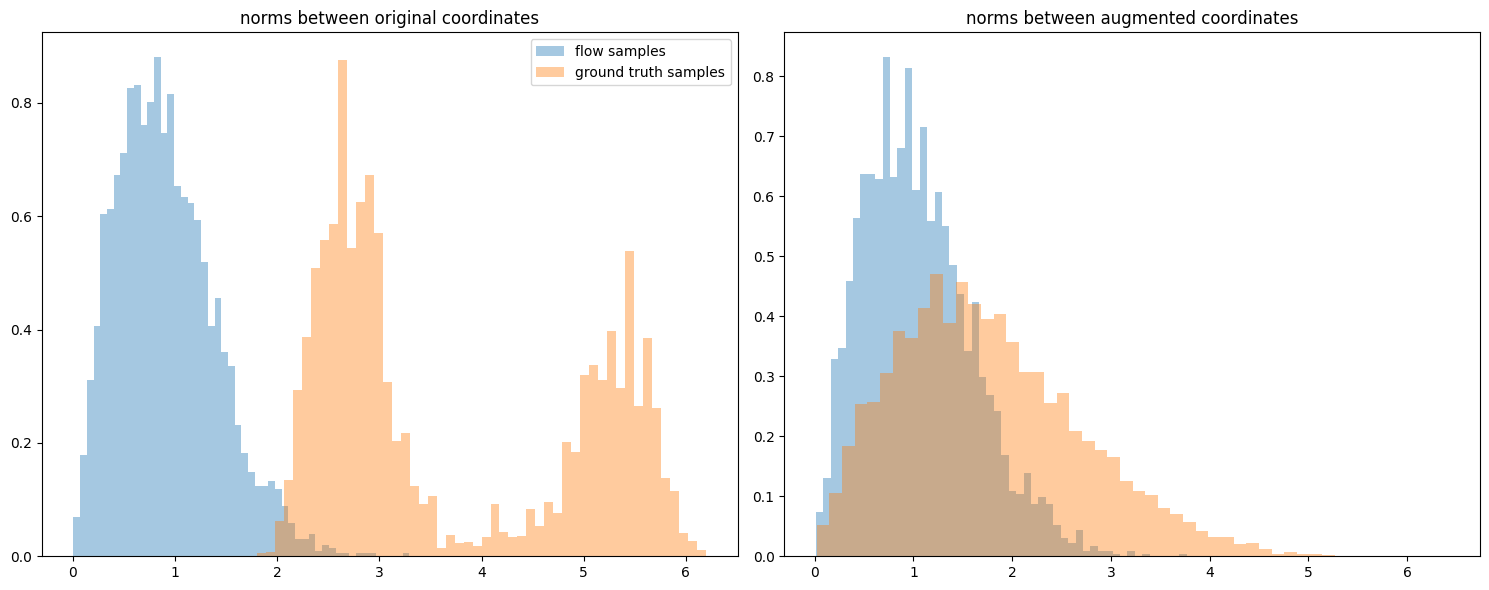

  0%|                                                   | 0/512 [00:00<?, ?it/s]

non numeric history values being saved


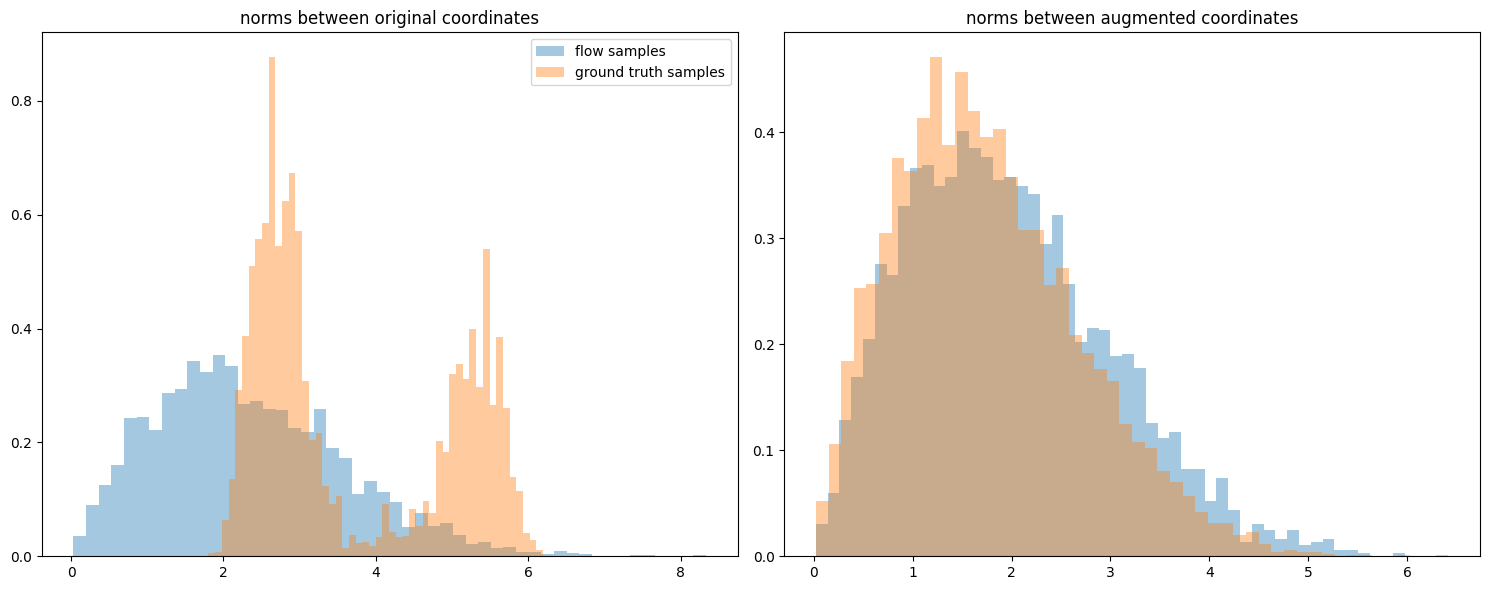

  0%|                                         | 1/512 [00:43<6:13:02, 43.80s/it]

{'ess': Array(0.00532489, dtype=float32), 'eval_kl': Array(-296.08002, dtype=float32), 'eval_log_lik': Array(-25.48144, dtype=float32), 'eval_marginal_log_lik': Array(-12.864475, dtype=float32)}


 20%|████████▏                                | 102/512 [01:07<01:33,  4.39it/s]

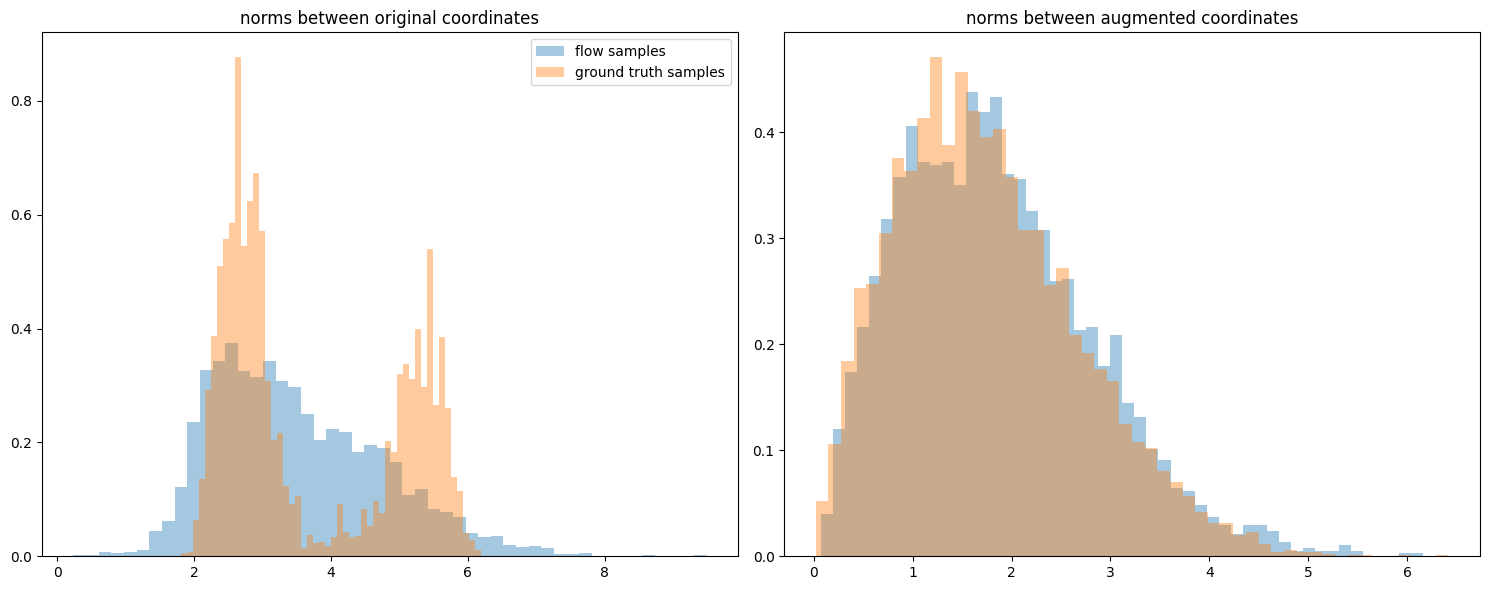

 20%|████████▏                                | 103/512 [01:09<04:54,  1.39it/s]

{'ess': Array(0.0036174, dtype=float32), 'eval_kl': Array(-300.15344, dtype=float32), 'eval_log_lik': Array(-21.408016, dtype=float32), 'eval_marginal_log_lik': Array(-9.2926655, dtype=float32)}


 40%|████████████████▎                        | 204/512 [01:33<01:08,  4.49it/s]

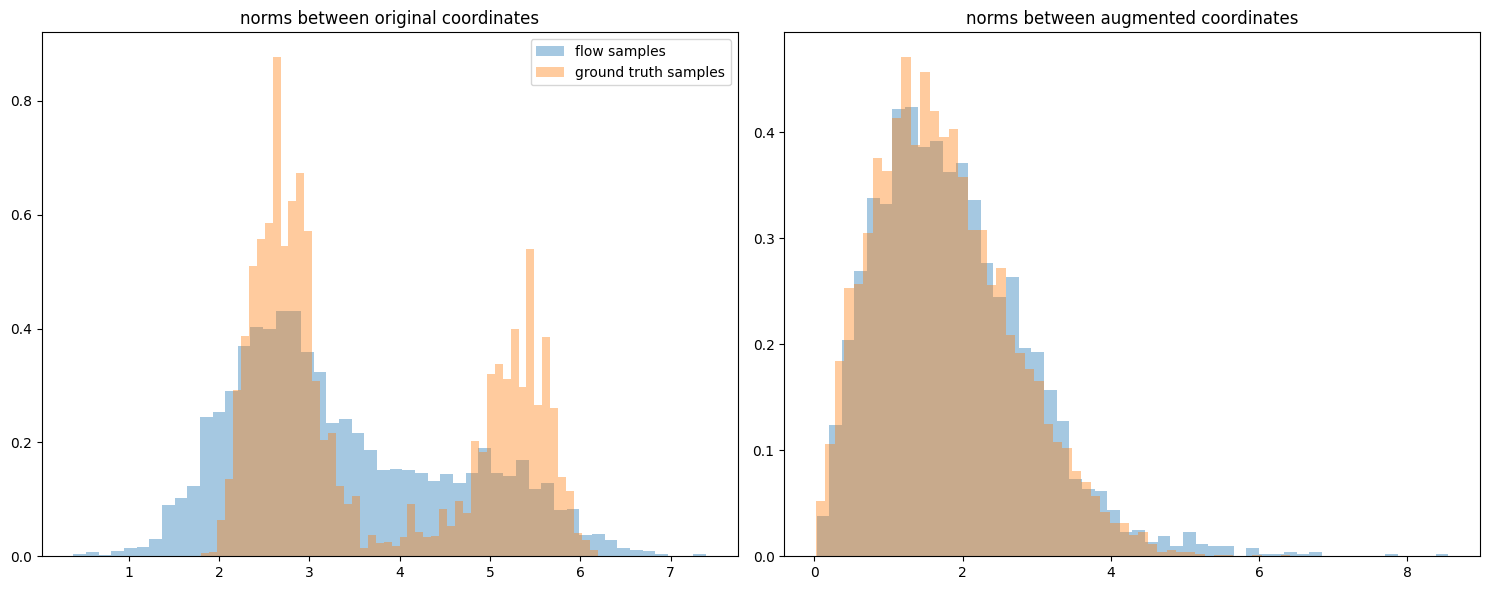

 40%|████████████████▍                        | 205/512 [01:35<03:43,  1.37it/s]

{'ess': Array(0.03785934, dtype=float32), 'eval_kl': Array(-301.39594, dtype=float32), 'eval_log_lik': Array(-20.165543, dtype=float32), 'eval_marginal_log_lik': Array(-7.607792, dtype=float32)}


 60%|████████████████████████▌                | 306/512 [01:59<00:44,  4.59it/s]

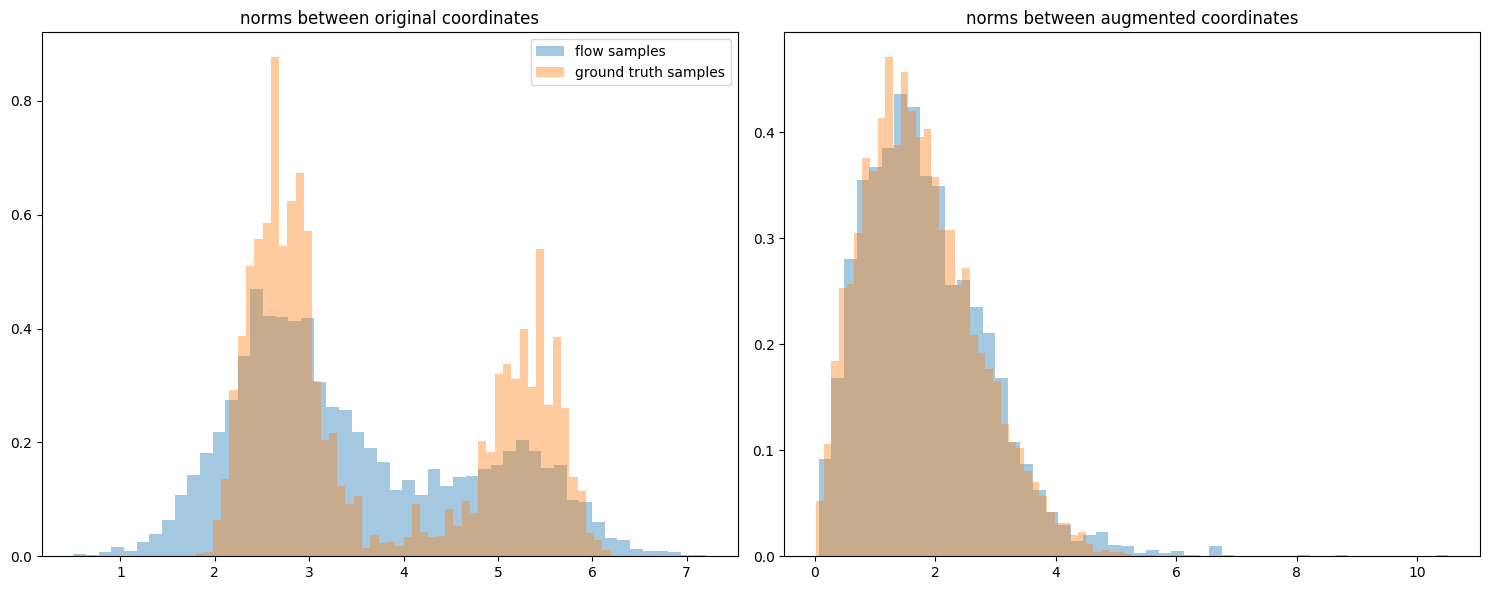

 60%|████████████████████████▌                | 307/512 [02:01<02:27,  1.39it/s]

{'ess': Array(0.01463392, dtype=float32), 'eval_kl': Array(-302.0056, dtype=float32), 'eval_log_lik': Array(-19.55583, dtype=float32), 'eval_marginal_log_lik': Array(-6.997038, dtype=float32)}


 80%|████████████████████████████████▋        | 408/512 [02:24<00:22,  4.69it/s]

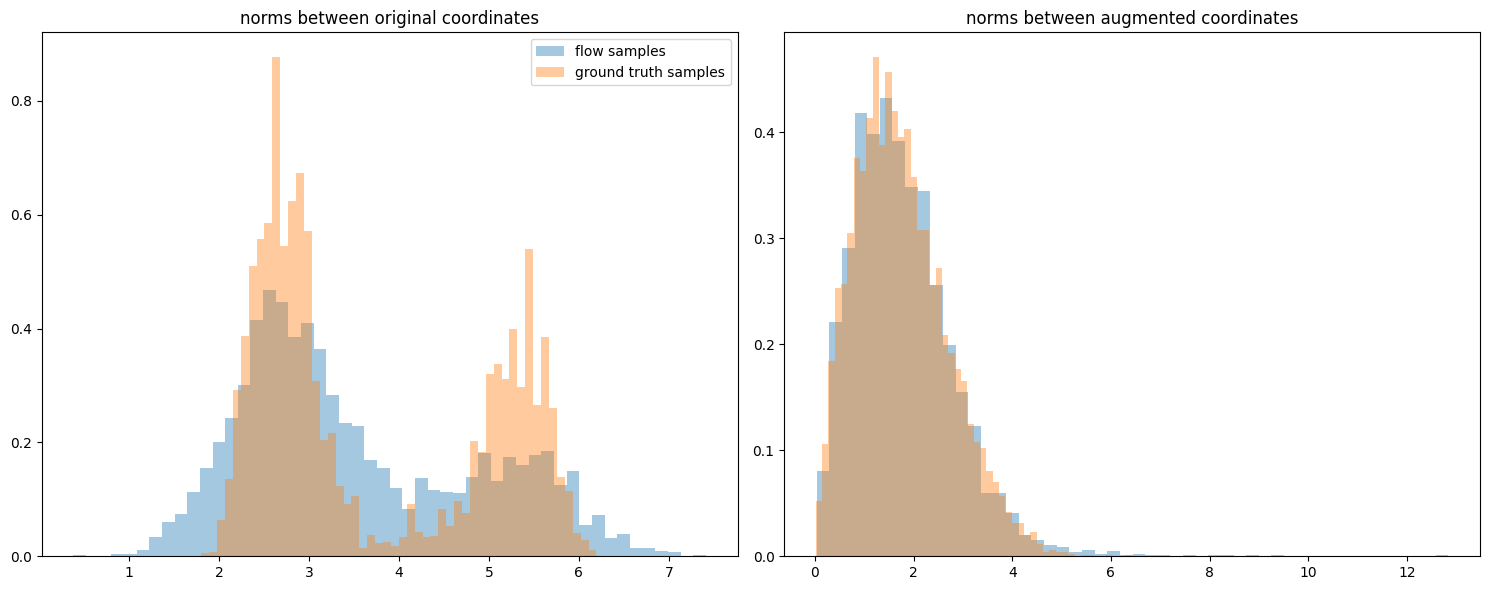

 80%|████████████████████████████████▊        | 409/512 [02:26<01:14,  1.38it/s]

{'ess': Array(0.02488374, dtype=float32), 'eval_kl': Array(-301.77972, dtype=float32), 'eval_log_lik': Array(-19.781717, dtype=float32), 'eval_marginal_log_lik': Array(-7.040556, dtype=float32)}


100%|████████████████████████████████████████▊| 510/512 [02:49<00:00,  4.62it/s]

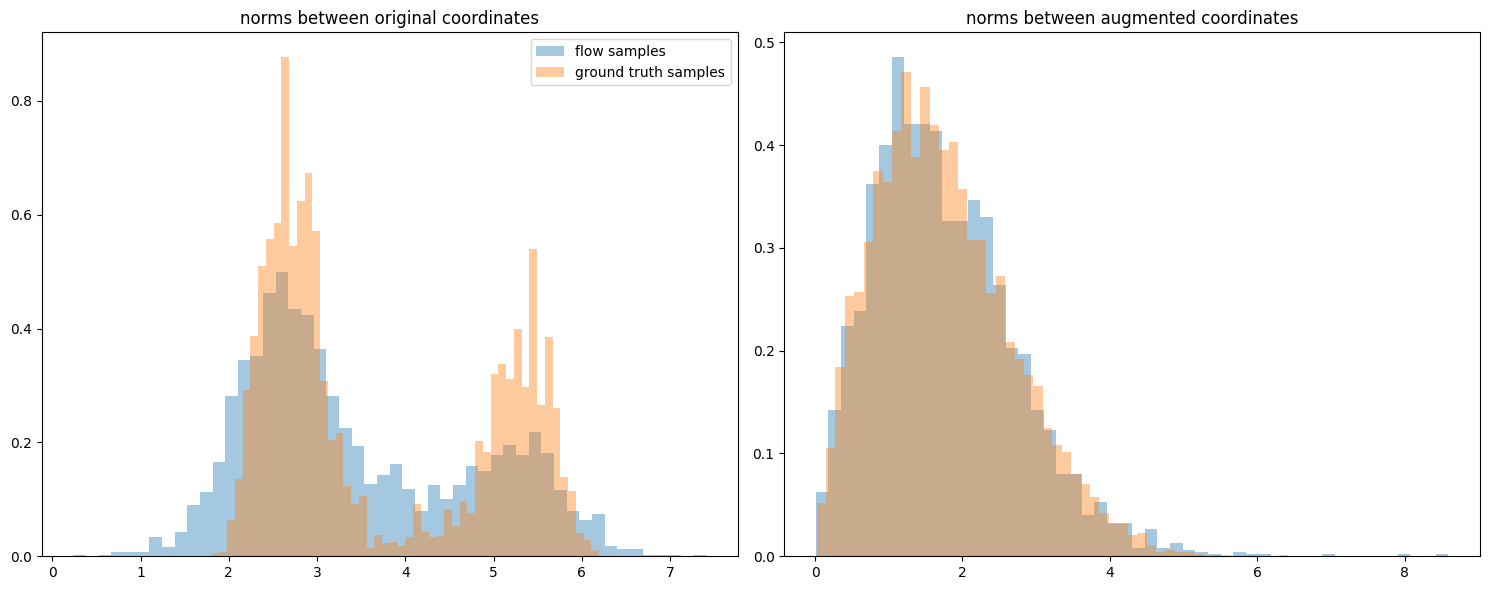

100%|████████████████████████████████████████▉| 511/512 [02:51<00:00,  1.40it/s]

{'ess': Array(0.02040894, dtype=float32), 'eval_kl': Array(-302.4939, dtype=float32), 'eval_log_lik': Array(-19.06754, dtype=float32), 'eval_marginal_log_lik': Array(-6.5163755, dtype=float32)}


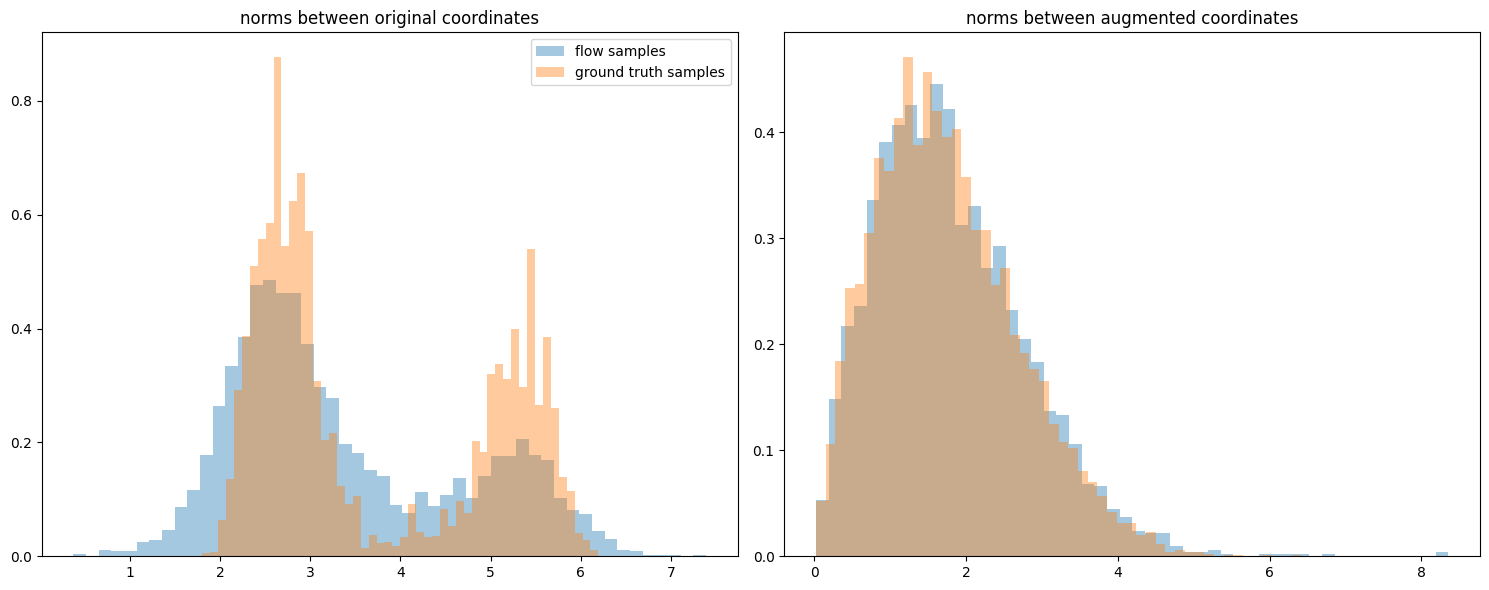

100%|█████████████████████████████████████████| 512/512 [02:53<00:00,  2.96it/s]


{'ess': Array(0.00879, dtype=float32), 'eval_kl': Array(-302.26288, dtype=float32), 'eval_log_lik': Array(-19.298584, dtype=float32), 'eval_marginal_log_lik': Array(-6.6091185, dtype=float32)}


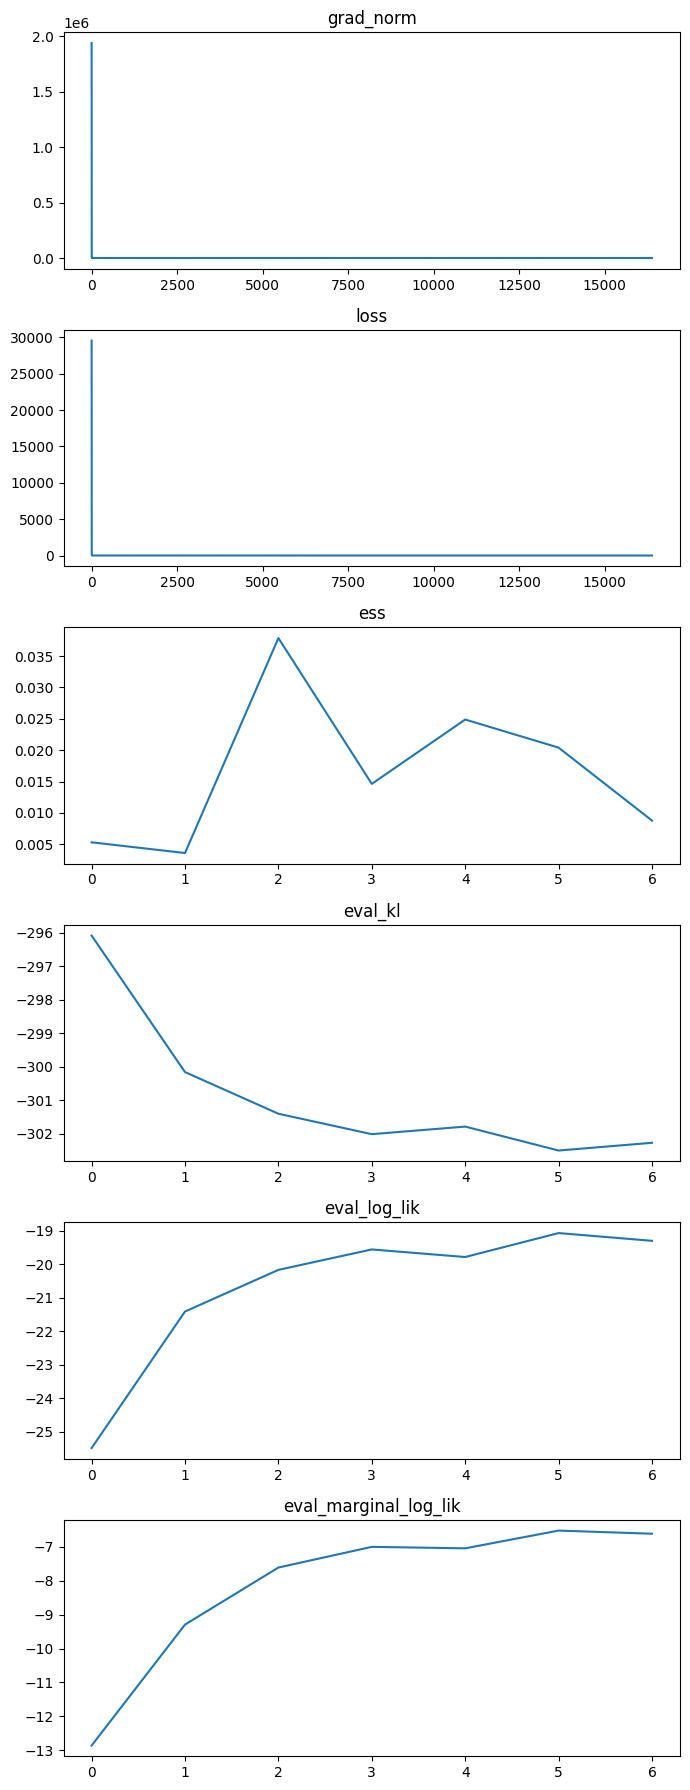

In [3]:
_ = train(
    n_epoch = int(512),
    dim = 2,
    lr = 5e-4,
    n_nodes = 4,
    n_layers = 12,
    batch_size = 32,
    max_global_norm = 100,  # jnp.inf
    mlp_units = (128, 128),
    key = jax.random.PRNGKey(0),
    flow_type = "vector_scale_shift",  # "nice", "proj", "vector_scale_shift"
    identity_init = True,
    n_plots = 5)